In [1]:
import numpy as np
import pylab as plt
from sklearn.model_selection import train_test_split

# Keras module
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

np.random.seed(7)

In [2]:
def get_tmp_data(dim=[10000, 60], multilabel=False):
    X = np.random.randint(0, 24, size=dim)
    y = np.random.randint(0, 2, size=dim[0])
    
    if multilabel:
        y = np.random.randint(0, 10, size=dim[0])
        y = to_categorical(y, num_classes=10)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    print (f"X_train.shape: {X_train.shape} y_train.shape:{y_train.shape}" )
    print (f"X_test.shape: {X_test.shape} y_test.shape:{y_test.shape}" )
    
    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_tmp_data()

X_train.shape: (7500, 60) y_train.shape:(7500,)
X_test.shape: (2500, 60) y_test.shape:(2500,)


In [3]:
print (X_train[1][:10], y_train[1])

[ 8 20  8 11 10  3 13 12  4  6] 0


In [5]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(100, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(4))
    model.add(Dense(y.shape[1], activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = make_model(X_train, y_train, embedding_length = 16)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 16)            1600      
_________________________________________________________________
lstm (LSTM)                  (None, 4)                 336       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 1,941
Trainable params: 1,941
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=10,
                    batch_size=64,
                    verbose=1)

Epoch 1/10
118/118 [==============================] - 3s 22ms/step - loss: 0.6933 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.6930 - accuracy: 0.5069 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/10
118/118 [==============================] - 2s 17ms/step - loss: 0.6927 - accuracy: 0.5116 - val_loss: 0.6935 - val_accuracy: 0.4940
Epoch 4/10
118/118 [==============================] - 2s 18ms/step - loss: 0.6923 - accuracy: 0.5193 - val_loss: 0.6937 - val_accuracy: 0.4924
Epoch 5/10
118/118 [==============================] - 2s 17ms/step - loss: 0.6918 - accuracy: 0.5180 - val_loss: 0.6942 - val_accuracy: 0.4976
Epoch 6/10
118/118 [==============================] - 2s 18ms/step - loss: 0.6912 - accuracy: 0.5241 - val_loss: 0.6953 - val_accuracy: 0.4956
Epoch 7/10
118/118 [==============================] - 2s 17ms/step - loss: 0.6909 - accuracy: 0.5279 - val_loss: 0.6957 - val_accuracy: 0.4928

79/79 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4944
Accuracy: 49.44%


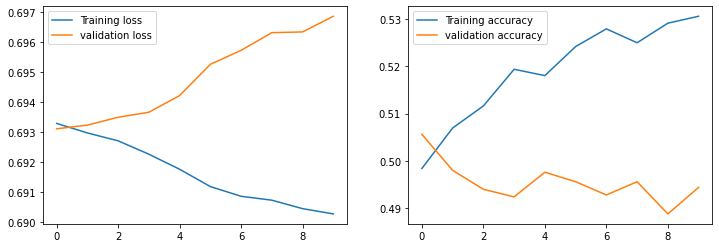

In [7]:
def plot_history(history):
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()

plot_history(history)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

### Multilabel classification

In [10]:
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = get_tmp_data(multilabel=True)
y_train[:5]

X_train.shape: (7500, 60) y_train.shape:(7500, 10)
X_test.shape: (2500, 60) y_test.shape:(2500, 10)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [11]:
y_train.shape

(7500, 10)

In [12]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(100, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(4))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = make_model(X_train, y_train, embedding_length = 16)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 16)            1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=10,
                    batch_size=64,
                    verbose=1)

Epoch 1/10
118/118 [==============================] - 3s 25ms/step - loss: 2.3030 - accuracy: 0.0961 - val_loss: 2.3024 - val_accuracy: 0.1028
Epoch 2/10
118/118 [==============================] - 3s 24ms/step - loss: 2.3021 - accuracy: 0.1039 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 3/10
118/118 [==============================] - 3s 22ms/step - loss: 2.3015 - accuracy: 0.1073 - val_loss: 2.3031 - val_accuracy: 0.0984
Epoch 4/10
118/118 [==============================] - 2s 18ms/step - loss: 2.3010 - accuracy: 0.1065 - val_loss: 2.3035 - val_accuracy: 0.0988
Epoch 5/10
118/118 [==============================] - 2s 16ms/step - loss: 2.3002 - accuracy: 0.1120 - val_loss: 2.3039 - val_accuracy: 0.0988
Epoch 6/10
118/118 [==============================] - 2s 20ms/step - loss: 2.2996 - accuracy: 0.1104 - val_loss: 2.3044 - val_accuracy: 0.0968
Epoch 7/10
118/118 [==============================] - 3s 22ms/step - loss: 2.2989 - accuracy: 0.1131 - val_loss: 2.3047 - val_accuracy: 0.0980

79/79 [==============================] - 0s 4ms/step - loss: 2.3054 - accuracy: 0.1024
Accuracy: 10.24%


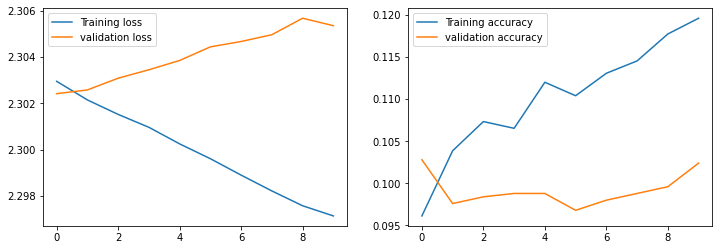

In [14]:
plot_history(history)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))